
# Diseño de software para cómputo científico

----

## Unidad 2: Testing


## Property base testing

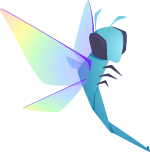

Paper seminal:

> Claessen, K., & Hughes, J. (2011). QuickCheck: a lightweight tool for random testing of Haskell programs. Acm sigplan notices, 46(4), 53-64.


<small>Fuente: <a href="https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/">https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/</a></small>

## Part 1: Example-based testing

- Given a test input `I`
- When passed to function under test
- should return an output `O`

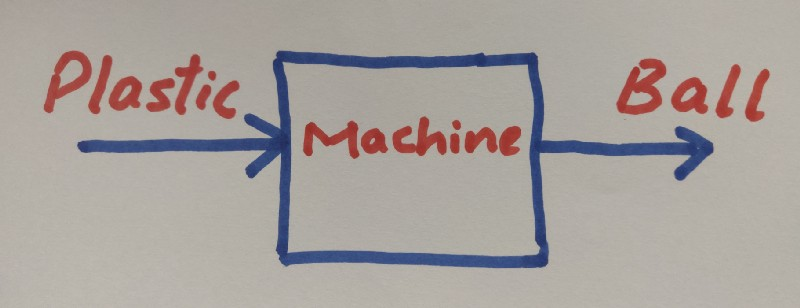

Probemos esta máquina con testing basado en ejemplos

- take a blue-coloured raw plastic (fixed test data)
- feed the plastic to machine
- expect a blue-coloured plastic ball as output (fixed test output)

## Lo mismo pero con un programa

In [1]:
# test_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


def test_sum():
    assert sum(1, 2) == 3


In [7]:
!pytest code/test_example.py -v

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.0.2, py-1.9.0, pluggy-0.13.1 -- /home/juan/proyectos/dis_ssw/bin/python
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/home/juan/proyectos/dis_ssw/src/clase09/.hypothesis/examples')
rootdir: /home/juan/proyectos/dis_ssw/src/clase09
plugins: hypothesis-5.35.4
collected 1 item                                                               

code/test_example.py::test_sum PASSED                                    [100%]

============================== 1 passed in 0.01s ===============================


## Este test es suficiente para **validar** la funcionalidad de `sum()`?

- La respuesta simple es no.
- Podemos usar parametrización de pytest para mejorar esto

In [ ]:
# test_param_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


import pytest


@pytest.mark.parametrize('num1, num2, expected',
    [(3, 5, 8), (-2, -2, -4), (-1, 5, 4), (3, -5, -2), (0, 5, 5) ]
)
def test_sum(num1, num2, expected):
    assert sum(num1, num2) == expected

In [9]:
!pytest code/test_param_example.py -v

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.0.2, py-1.9.0, pluggy-0.13.1 -- /home/juan/proyectos/dis_ssw/bin/python
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/home/juan/proyectos/dis_ssw/src/clase09/.hypothesis/examples')
rootdir: /home/juan/proyectos/dis_ssw/src/clase09
plugins: hypothesis-5.35.4
collected 5 items                                                              

code/test_param_example.py::test_sum[3-5-8] PASSED                       [ 20%]
code/test_param_example.py::test_sum[-2--2--4] PASSED                    [ 40%]
code/test_param_example.py::test_sum[-1-5-4] PASSED                      [ 60%]
code/test_param_example.py::test_sum[3--5--2] PASSED                     [ 80%]
code/test_param_example.py::test_sum[0-5-5] PASSED                       [100%]

============================== 5 passed in 0.02s ===============================


Pero es esencialmente más de lo mismo. Lo cual nos lleva a al primer problema de los testings basados en ejemplos

## Issue 1: La exhaustividad depende de la persona que escribe los tests

- La persona puede querer escribir 5, 50 o 500 tests.
- Pero nunca puede estar seguro si logro probar todo. (sobre todos los edge cases)

Lo cual nos lleva al segundo problema

##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


Nos dieron todos los detalles de la función sum?


- Que tipo de input espera la función?
- Como debe comportarse la funcion frente a inputs inesperados?
- Que tipo de output debe retornar nuestra función?



##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


O si lo ponemos en contexto de nuestro código:

- `num1` y `num2` tienen que ser `int` o `float`? pueden ser `str`?
- Hay cotas minimas y maximas para `num1` y `num2`?
- Como manejo `None`?
- El retorno tiene que ser `int` o `float`?
- Cuales ecenarios justifican mensajes de errores?
- Hay algun ecenario donde pueda engañar al test?

In [ ]:
# test_buggy_example.py

def sum(num1, num2):
    """Buggy logic"""
    results = {
        (3, 5): 8, (-2, -2): -4, 
        (-1, 5): 4, (3, -5): -2, (0, 5): 5}
    return results.get((num1, num2))

import pytest


@pytest.mark.parametrize(
    'num1, num2, expected',
    [(3, 5, 8), (-2, -2, -4), (-1, 5, 4), (3, -5, -2), (0, 5, 5)])
def test_sum(num1, num2, expected):
    assert sum(num1, num2) == expected

## Part 2: Property-based testing

- Los frameworks de Property based testing frameworks verifican la veracidad de propiedades
- Una propiedad es un statement del tipo:

```python
    for all (x, y, …)
    such as precondition(x, y, …) holds
    property(x, y, …) is true.
```

Asi el *aproach* en propiedades para la maquina de hacer pelotas seria:

- Dada una gran coleccion de plasticos.
- Aseguraque todos este coloreados.
- Y la salida tiene que tener las siguientes propiedades:
    - Es esferica.
    - Es coloreada con el mismo color del input.

## Hypotesis testing

In [10]:
!pip install hypothesis

In [11]:
# test_property_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


from hypothesis import given
from hypothesis import strategies as st


@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

In [12]:
!pytest code/test_example.py -s

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.0.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/juan/proyectos/dis_ssw/src/clase09
plugins: hypothesis-5.35.4
collected 1 item                                                               

code/test_example.py .

============================== 1 passed in 0.01s ===============================


## Hypotesis testing - Verbose

In [13]:
# test_property_v_example.py

from hypothesis import given, settings, Verbosity, example
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
@example(1, 2)
@example(0, 0)
@example(10000, 2000000)
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

In [16]:
!pytest code/test_property_v_example.py -v -s

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.0.2, py-1.9.0, pluggy-0.13.1 -- /home/juan/proyectos/dis_ssw/bin/python
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/home/juan/proyectos/dis_ssw/src/clase09/.hypothesis/examples')
rootdir: /home/juan/proyectos/dis_ssw/src/clase09
plugins: hypothesis-5.35.4
collected 1 item                                                               

code/test_property_v_example.py::test_sum Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=-13136, num2=-13447,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=30859, num2=-81,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=13701, num2=109714425577976556269288484967734136141,
)
Tryi

## Las estrategias son desgraciadas

In [20]:
st.lists(st.text(), min_size=5, unique=True).example()

['',
 '\x8a\U00072137\U0003ff2c\U000f08cd\x95',
 '\xa0·\x81\t',
 'Ô\U0003ef6býÌ',
 '\U00079c6e\x8b¥\x83\x01N',
 'T\x95?YÇ',
 '\U000c257d!',
 '\U000ddb1a4§',
 'z~\x94És\U00014a75',
 '¼',
 'ò\x8f\U000bc485Õm\x9fxh\x98w¯Ô9ë<o\x03',
 '\U00082284£6Á',
 'h',
 '*\x0e?',
 '\U0004e040\x85\U0004b778´',
 '\xad+',
 'º\U000c66ea(-n\x1d\xa0«Ýø',
 '\U000c6833\U0007dd54',
 'v\U0006af06s\x8f\x93I\xa0\x9e×ø\x82v\x8d©\x1d\x1d|üñ\x97\x814\\\x81b¢',
 '\U00032685\xa0tÚ6n\x82\U0009122e\U000f3c67\U000daaeeo']

In [23]:
st.dictionaries(st.characters(), st.floats(), min_size=3).example()

{'\U000840d3': nan,
 '¯': 5.616822866121135e+16,
 '\x7f': 0.0,
 'Õ': nan,
 'd': inf,
 '(': -1.2870932729159812e+16}

Sobre las estrategias: https://hypothesis.readthedocs.io/en/latest/data.html

## Hay estrategias para el stack científico

In [27]:
from hypothesis.extra import numpy as npst

npst.arrays(float, (3, 4), elements=None, fill=None, unique=True).example()

array([[-1.05623344e+232,  3.33333333e-001, -1.00000000e+007,
                     nan],
       [ 2.92588229e+016,              nan, -4.54855530e-083,
         5.87105949e+016],
       [ 1.19209290e-007,  1.79769313e+308, -9.00719925e+015,
                     inf]])

In [33]:
from hypothesis.extra import pandas as pdst

pdst.data_frames([
    pdst.column('A', dtype=int, unique=True), 
    pdst.column('B', dtype=float, unique=True)]).example()

A              B
0          -4052527967   1.100000e+00
1          -3714902919            NaN
2                58868   1.500000e+00
3  4969051770273506928  -5.988166e+16
4  1944565480375017367           -inf
5               -18467  -1.192093e-07
6                 -235  1.083686e-273
7                29501            inf

## Pensando en propiedades reales

- Al parecer la suma es conmutativa.
- Sumar cero a un valor devuelve el mismo valor

In [34]:
from hypothesis import given, settings, Verbosity
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(0, num2) == num2
    assert sum(num1, num2) == sum(num2, num1)
    assert sum(num1, num2) - num1 == num2

## Shrinking

- Hasta ahora todo es razonable de programar.
- Pero la inferencia es solo parte del truco.

In [35]:
@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(num1, num2) == sum(num2, num1)
    assert num1 <= 30

In [46]:
!pytest code/test_property_srink_example.py -s -v

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.0.2, py-1.9.0, pluggy-0.13.1 -- /home/juan/proyectos/dis_ssw/bin/python
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/home/juan/proyectos/dis_ssw/src/clase09/.hypothesis/examples')
rootdir: /home/juan/proyectos/dis_ssw/src/clase09
plugins: hypothesis-5.35.4
collected 1 item                                                               

code/test_property_srink_example.py::test_sum Trying example: test_sum(
    num1=31, num2=0,
)
Traceback (most recent call last):
  File "/home/juan/proyectos/dis_ssw/src/clase09/code/test_property_srink_example.py", line 14, in test_sum
    assert num1 <= 30
AssertionError: assert 31 <= 30

Trying example: test_sum(
    num1=31, num2=0,
)
Traceback (most recent call last):
  File "/home/juan/proyectos/dis_ssw/src/clase09/code/test_property_srink_example.py", line 14, in test_sum
   

Hypotesis trata de encontrar el ejemplo minimo entendible para un ser humano

### Estrategias custom

In [97]:
import attr

@attr.s(hash=True)
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()
    
    
class Persona:
    def __init__(self, name, edad):
        self.name = name
        self.edad = edad
        
l = [1]
hash("hola")    





TypeError: unhashable type: 'list'

In [84]:
PersonaStrategy = st.lists(st.builds(
  Persona,
  st.text(min_size=5, max_size=10),
  st.integers(min_value=0, max_value=80)), min_size=3, unique=True)


@PersonaStrategy
def test_persona(persona):
    assert persona.edad <= 120
    assert persona.edad >= 0
    
    
PersonaMalaEdadStrategy = st.lists(st.builds(
  Persona,
  st.text(min_size=5, max_size=10),
  st.integers(), min_size=3, unique=True))
                                   
@PersonaMalaEdadStrategy()
def test_persona_mala(p):
    with pytest.raises(ValueError) 
    
                                   
                                   
    

In [90]:
PersonaStrategy.example()

[Persona(name='\U000ac665]Ï}7\x8d', edad=55, mayor_de_edad=False),
 Persona(name='Îf\U000d64b7r\U000d16a6ºr\\\x0eü', edad=26, mayor_de_edad=False),
 Persona(name='º¤<L$\x05', edad=17, mayor_de_edad=False),
 Persona(name="äÂ¡𛈳'¿Ø®Å2", edad=44, mayor_de_edad=True),
 Persona(name='Ò¹\U000db881Sk$\x15l,\U000d81f7', edad=22, mayor_de_edad=True),
 Persona(name='ð\x7fHÀj\U000857a32¦\U00030a557', edad=68, mayor_de_edad=False),
 Persona(name='\U000632c9\U000f5573dà+', edad=69, mayor_de_edad=True),
 Persona(name='a\U00016b7b]\x07Gø\x7f\U00033b88\U00049fe8n', edad=41, mayor_de_edad=False)]

### Estrategias custom (con composición)

In [51]:
import attr
@attr.s(hash=True)
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()
    mayor_de_edad: bool = attr.ib()

In [54]:
@st.composite
def persona_stategy(draw):
    name = draw(st.text(min_size=5, max_size=80))
    age = draw(st.integers(min_value=0, max_value=17))
    mayor_de_edad = draw(st.booleans())
    return Persona(name, age, mayor_de_edad)


In [83]:
persona_stategy().example()

Persona(name='\x8a´\U0001eba5q×\n\x18Òë\\\U000d738b\U0010ddea\x96\U000adab5¡\x03h»\x88S\ue897â[n\tl', edad=3, mayor_de_edad=False)